In [25]:
library(ISLR)
library(randomForest)
library(tree)

In [26]:
data(iris)

In [27]:
rm(list = ls())
set.seed(42)
n = nrow(iris)
# Train/test partition
indtrain = sample(1:n, round(0.75 * n)) # Indices for train
indtest = setdiff(1:n, indtrain) # Indices for test

In [28]:
# RF
rf = randomForest(Species ~., iris , subset = indtrain)
# RF configuration: no. of trees? no. of predictors considered at each node?
rf


Call:
 randomForest(formula = Species ~ ., data = iris, subset = indtrain) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 5.36%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         39          0         0  0.00000000
versicolor      0         36         2  0.05263158
virginica       0          4        31  0.11428571

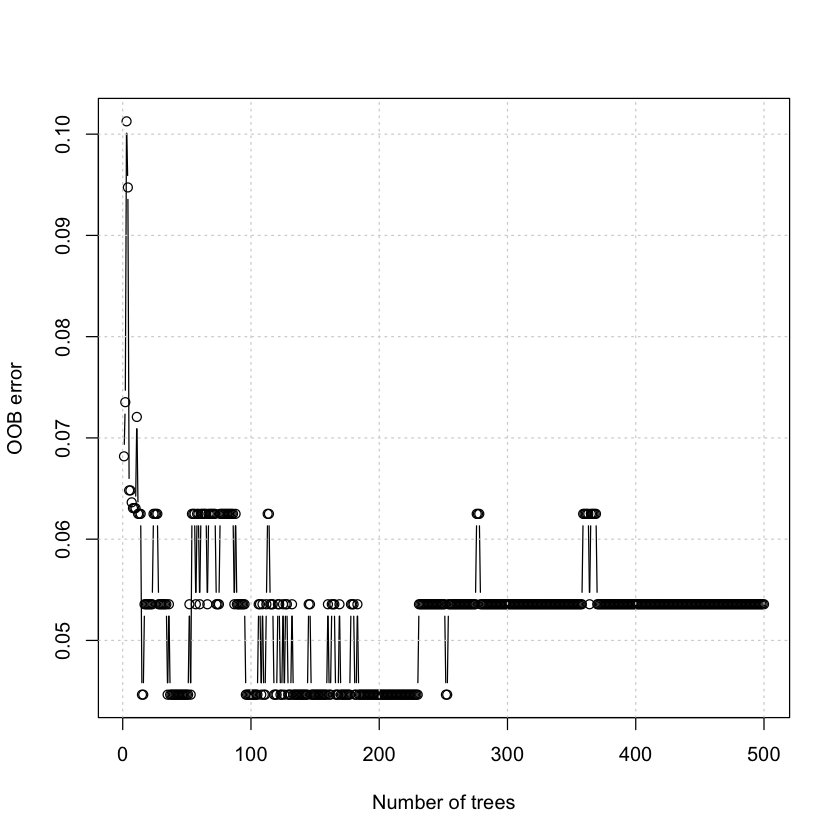

In [29]:
# OOB error
par(bg = "white")
plot(rf$err.rate[, 1],
    type = "b",
    xlab = "Number of trees",
    ylab = "OOB error")
grid()

In [30]:
# Prediction for test
pred = predict(rf, iris[indtest, ])
# Accuracy
sum(diag(table(pred, iris$Species[indtest]))) / length(indtest)

[1] 0.9473684

In [31]:
# Comparison with a single tree
t = tree(Species ~., iris, subset = indtrain)
# Prediction for test
pred.t = predict(t, iris[indtest, ], type = "class")
# Accuracy
sum(diag(table(pred.t, iris$Species[indtest]))) / length(indtest)

[1] 0.9473684

In [34]:
table(pred, iris$Species[indtest])
table(pred.t, iris$Species[indtest])

            
pred         setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         12         0
  virginica       0          2        14

            
pred.t       setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         12         2
  virginica       0          2        12

In [39]:
rfValue <- NULL
treeValue <- NULL
for (i in c(1:100)){
    n <- nrow(iris)
    # Train/test partition
    indtrain <- sample(1:n, round(0.75*n)) # indices for train
    indtest <- setdiff(1:n, indtrain) # indices for test
    rf <- randomForest(Species ~., iris , subset = indtrain, ntree=250)
    # Prediction for test
    pred <- predict(rf, iris[indtest, ])
    # Accuracy
    rfValue <- c(rfValue, sum(diag(table(pred, iris$Species[indtest]))) / length(indtest))
    # Comparison with a single tree
    t = tree(Species ~., iris, subset = indtrain)
    # Prediction for test
    pred.t = predict(t, iris[indtest, ], type = "class")
    # Accuracy
    treeValue <- c(treeValue, sum(diag(table(pred.t, iris$Species[indtest]))) / length(indtest))
}
cat("Mean T:", mean(treeValue), "\n")
cat("Mean RF:", mean(rfValue), "\n")
cat("Standard deviation T:", sd(treeValue), "\n")
cat("Standard deviation RF:", sd(rfValue))

Mean T: 0.9468421 
Mean RF: 0.9526316 
Standard deviation T: 0.03832367 
Standard deviation RF: 0.02823912

In [45]:
load("meteo.RData")
# Keeping only 1000 days for this example
n = 1000
y = y[1:n]
x = x[1:n, ]

In [46]:
# Train/test partition
indtrain = sample(1:n, round(0.75 * n)) # Indices for train
indtest = setdiff(1:n, indtrain) # Indices for test

In [47]:
# Binary occurrence (1/0)
occ = y
occ[which(y < 1)] = 0
occ[which(y >= 1)] = 1

In [48]:
# dataframe for occurrence
df.occ = data.frame(y.occ = as.factor(occ), predictors = x)

In [49]:
# RF
rf = randomForest(y.occ ~., df.occ, subset = indtrain)
# RF configuration: no. of trees? no. of predictors considered at each node?
rf


Call:
 randomForest(formula = y.occ ~ ., data = df.occ, subset = indtrain) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 17

        OOB estimate of  error rate: 13.33%
Confusion matrix:
    0  1 class.error
0 574 30  0.04966887
1  70 76  0.47945205

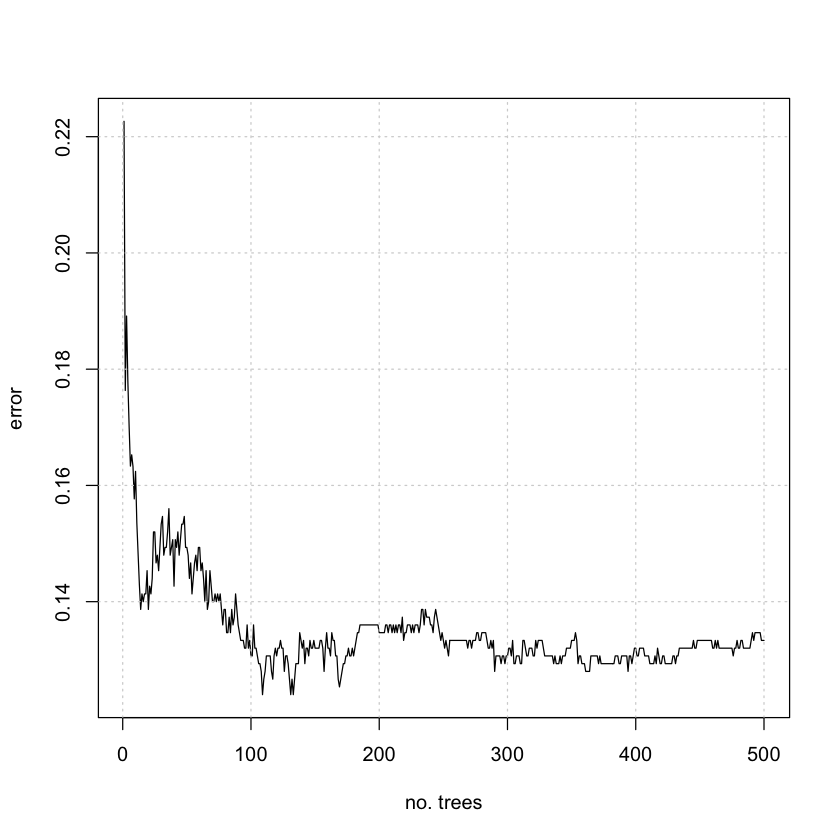

In [52]:
# OOB error?
par(bg = "white")
plot(rf$err.rate[, 1], type = "l", xlab = "no. trees", ylab = "OOB
error")
grid()

In [51]:
# Test error?
pred = predict(rf, df.occ[indtest, ])
1 - sum(diag(table(pred, df.occ$y.occ[indtest]))) /
length(indtest) # Error (1-accuracy)

[1] 0.108

In [59]:
# Fitting the optimum number of predictors considered at each node (mtry)
ntree = which(rf$err.rate[,1] == min(rf$err.rate[,1]))

In [61]:
ntree

[1] 109 131 133

In [60]:
# OOB error?
err.oob = c()
for (mtry in 1:17) {
    rf.mtry = randomForest(y.occ ~.,
        df.occ,
        subset = indtrain,
        ntree = ntree,
        mtry = mtry
    )
        err.oob[mtry] = rf.mtry$err.rate[ntree, 1]
}

par(bg = "white")
plot(err.oob, type = "b", xlab = "no. predictors", ylab = "OBBerror")
grid()

ERROR: Error in integer(ntree): invalid 'length' argument


In [54]:
library(adabag)

Loading required package: rpart

Loading required package: caret

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Loading required package: foreach

Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel

